# Fig7 model scripts

Below are the scripts for generating simulation results in Fig 7.

The module "cnmodel" is installed from https://github.com/cnmodel/cnmodel

Other required modules are 
HwlData.py (included), 
HNeuron.py (included), 
Hsignals.py (included), 
numpy, 
matplotlib, 
pandas, 
scipy, 
pickle

In [1]:

import HwlData as hw
import importlib
import cnmodel.cells
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neuron import h
from neuron.units import ms, mV
# use high-level simulation
h.load_file('stdrun.hoc')
from scipy.io import loadmat
import pickle
plt.style.use('./paper.mplstyle')

import HNeuron as hn

## input datasets (from recorded ANF fibers)
# tuple format: (expname, IDstring)
# ANF with cf at 25k
ds1 = ('L19068', '18-7')
# ANF with cf at 20k
ds2 = ('L19071', '21-5')
# ANF with cf at 16k
ds3 = ('L19106', '2-7')
# ANF with cf at 12k
ds4 = ('L19038', '19-5')


# set temperature to 33C
h.celsius = 33



## major inputs at 25 kHz

(<Figure size 480x180 with 10 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c06ecb280>,
       dtype=object))

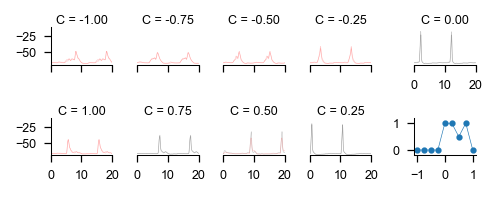

In [6]:
# major inputs: 25 kHz
# weights: (100, 20, 10, 10)
# change the number of trials to 100 for 100 trials (ntrials=100)
# for demo, only 2 trials are shown
datasets = [ds1 + (100, ), ds2 + (20, ), ds3 + (10, ), ds4 + (10, )]
octopus = cnmodel.cells.OctopusRothman()
t, vmarray, syn_iarray, syn_garray, spkt_array = hn.get_simu_new(datasets, 9, octopus, ntrials=2, gsyn=2*1e-3)
# plot
plt_simdata(t, vmarray, plt_type='vm', threshold=-40)

## Major inputs at 16 kHz

(<Figure size 480x180 with 10 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84867cde50>,
       dtype=object))

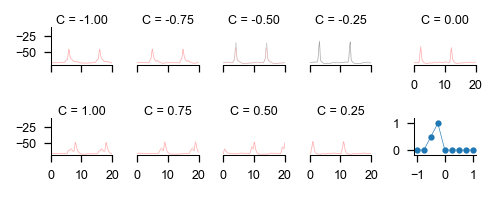

In [20]:
# major inputs: 16 kHz
# weights: (10, 20, 100, 10)
# change the number of trials to 100 for 100 trials (ntrials=100)
# for demo, only 2 trials are shown
datasets = [ds1 + (10, ), ds2 + (20, ), ds3 + (100, ), ds4 + (10, )]
octopus = cnmodel.cells.OctopusRothman()
t, vmarray, syn_iarray, syn_garray, spkt_array = hn.get_simu_new(datasets, 9, octopus, ntrials=2, gsyn=2*1e-3)

# plot
plt_simdata(t, vmarray, plt_type='vm', threshold=-40)

## Equal weights

(<Figure size 480x180 with 10 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f848fc8b070>,
       dtype=object))

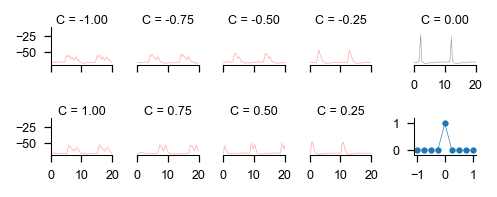

In [22]:
# major inputs: NONE
# weights: (40, 40, 40, 40)
# change the number of trials to 100 for 100 trials (ntrials=100)
# for demo, only 2 trials are shown
datasets = [ds1 + (40, ), ds2 + (40, ), ds3 + (40, ), ds4 + (40, )]
octopus = cnmodel.cells.OctopusRothman()
t, vmarray, syn_iarray, syn_garray, spkt_array = hn.get_simu_new(datasets, 9, octopus, ntrials=2, gsyn=2*1e-3)

# plot
plt_simdata(t, vmarray, plt_type='vm', threshold=-40)

## Functions

In [3]:
def plt_simdata(t, data, plt_type='vm', threshold=-40):
    """ plot simulated data in one big figure
    inputs:
        t::1-D array
            time axis for the data
        data::3-D array
            vmarray or others
        plt_type::string
            'vm' (default): plot vm
        threshold::double
            threshold for detecting spikes
            default: -40
    returns:
        fig::figure
        axs::axes
            
    """
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(3.2, 1.2), gridspec_kw=dict(hspace=0, wspace=0))

    # trial numbers to plot
    itry = np.random.choice(100, 100, replace=False)
    pspike = np.empty(9)
    for ic, c in enumerate(np.arange(-1, 1.25, 0.25)):
        if c <= 0:
            irow = 0
            icol = ic
        else:
            irow = 1
            icol = 8 - ic
        ax = axs[irow, icol]
        pspike[ic] = hn.plt_simu_new(ax, t, data, ic, itry, plt_type=plt_type, threshold=threshold)
        ax.set_title('C = %0.2f' % c, fontsize=6, va='top')

    # link nonzero C axes with C = 0 
    ylim = [-70, -10]
    axs[0, -1].set_xlim([100, 120])
    axs[0, -1].set_xticks([100, 110, 120])
    axs[0, -1].set_xticklabels(np.arange(0, 25, 10))
    axs[0, -1].set_ylim(ylim)
    axs[0, -1].spines['left'].set_visible(False)
    axs[0, -1].set_yticks([])
    for a in axs[:, :4].flat:
        a.set_xlim([100, 120])
        a.set_xticks([100, 110, 120])
        a.set_xticklabels(np.arange(0, 25, 10))

    for a in axs[:, 1:4].flat:
        a.spines['left'].set_visible(False)
        a.set_yticks([])

    for a in axs[:, :4].flat:
        a.set_ylim(ylim)
    #     a.axis('off')
    #     a.axis('off')

    for a in axs[0, :4].flat:
        a.set_xticklabels([])
    #     a.spines['bottom'].set_visible(False)

    # set last axis off
    # axs[-1, -1].axis('off')
    # plot spike probability in axs[-1, -1]
    axs[-1, -1].plot(np.arange(-1, 1.25, 0.25), pspike, '-o', markersize=2)
    axs[-1, -1].set_ylim([-0.2, 1.2])
    # axs[-1, -1].set_ylabel('Spike Prob')
    
    return fig, axs